# Time Series Descriptive and Classical Methods

# Concept Session

## Demo - 2.1: Time Series Components

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

# ignore warnings
    import warnings
    warnings.filterwarnings('ignore')

In [2]:
help(seasonal_decompose)

"""The seasonal decomposition is a method used in time series analysis to represent a time series as a
sum (or, sometimes, a product) of three components - the linear trend, the periodic (seasonal) component, and 
random residuals."""

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

'The seasonal decomposition is a method used in time series analysis to represent a time series as a\nsum (or, sometimes, a product) of three components - the linear trend, the periodic (seasonal) component, and \nrandom residuals.'

In [3]:
# read the datasets
mrf = pd.read_csv("DS3_C1_S2_MRF_Data_Concept.csv", parse_dates=['Month']) #Month is a column

#Parse dates converts srting data into date and time format

"""parse_dates : bool or list of int or names or list of lists or dict, default False
    The behavior is as follows:

    * boolean. If True -> try parsing the index.
    * list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3
      each as a separate date column.
    * list of lists. e.g.  If [[1, 3]] -> combine columns 1 and 3 and parse as
      a single date column.
    * dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call
      result 'foo'

    If a column or index cannot be represented as an array of datetimes,
    say because of an unparsable value or a mixture of timezones, the column
    or index will be returned unaltered as an object data type. For
    non-standard datetime parsing, use ``pd.to_datetime`` after
    ``pd.read_csv``. To parse an index or column with a mixture of timezones,
    specify ``date_parser`` to be a partially-applied
    :func:`pandas.to_datetime` with ``utc=True``. See
    :ref:`io.csv.mixed_timezones` for more.

    Note: A fast-path exists for iso8601-formatted dates."""

"parse_dates : bool or list of int or names or list of lists or dict, default False\n    The behavior is as follows:\n\n    * boolean. If True -> try parsing the index.\n    * list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3\n      each as a separate date column.\n    * list of lists. e.g.  If [[1, 3]] -> combine columns 1 and 3 and parse as\n      a single date column.\n    * dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call\n      result 'foo'\n\n    If a column or index cannot be represented as an array of datetimes,\n    say because of an unparsable value or a mixture of timezones, the column\n    or index will be returned unaltered as an object data type. For\n    non-standard datetime parsing, use ``pd.to_datetime`` after\n    ``pd.read_csv``. To parse an index or column with a mixture of timezones,\n    specify ``date_parser`` to be a partially-applied\n    :func:`pandas.to_datetime` with ``utc=True``. See\n    :ref:`io.csv.mixed_timezones`

In [4]:
mrf.head()

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,Jan-06,2780.0,2895.5,2670.0,2811.60,39623,3358,109309329,27061,68.30,225.5,31.60
1,Feb-06,2820.0,3399.0,2800.0,3056.45,77350,8001,242294622,42901,55.46,599.0,236.45
2,Mar-06,3075.0,3287.5,3040.0,3103.20,55500,4988,176800378,39229,70.68,247.5,28.20
3,Apr-06,3160.0,4051.0,3131.0,3456.15,131712,12834,496800616,59934,45.50,920.0,296.15
4,May-06,3550.0,3650.0,2747.0,2789.80,29158,4432,96482558,18375,63.02,903.0,-760.20


In [5]:
# add a new date colum 
d1=pd.date_range(start="1/1/2006", end="5/31/2016",freq="M")
mrf['tdate']=d1

In [6]:
# set time data as index
mrf=mrf.set_index('tdate')

# A time series is a series of data points indexed in time order. If you index the dataset by date, 
#you can easily carry out a time series analysis. 

print(mrf)

             Month  Open Price  High Price  Low Price  Close Price  \
tdate                                                                
2006-01-31  Jan-06      2780.0     2895.50    2670.00      2811.60   
2006-02-28  Feb-06      2820.0     3399.00    2800.00      3056.45   
2006-03-31  Mar-06      3075.0     3287.50    3040.00      3103.20   
2006-04-30  Apr-06      3160.0     4051.00    3131.00      3456.15   
2006-05-31  May-06      3550.0     3650.00    2747.00      2789.80   
...            ...         ...         ...        ...          ...   
2016-01-31  Jan-16     40000.0    41399.95   34563.20     35607.10   
2016-02-29  Feb-16     35672.1    35865.00   31190.00     32429.35   
2016-03-31  Mar-16     32400.0    38969.35   32400.00     38368.50   
2016-04-30  Apr-16     38100.0    38299.00   33550.05     33791.60   
2016-05-31  May-16     33714.8    34850.00   33210.50     33759.60   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
tdate                   

In [7]:
closeprice = mrf[['Close Price']]
print(closeprice.head())

            Close Price
tdate                  
2006-01-31      2811.60
2006-02-28      3056.45
2006-03-31      3103.20
2006-04-30      3456.15
2006-05-31      2789.80


In [8]:
type(closeprice)

pandas.core.frame.DataFrame

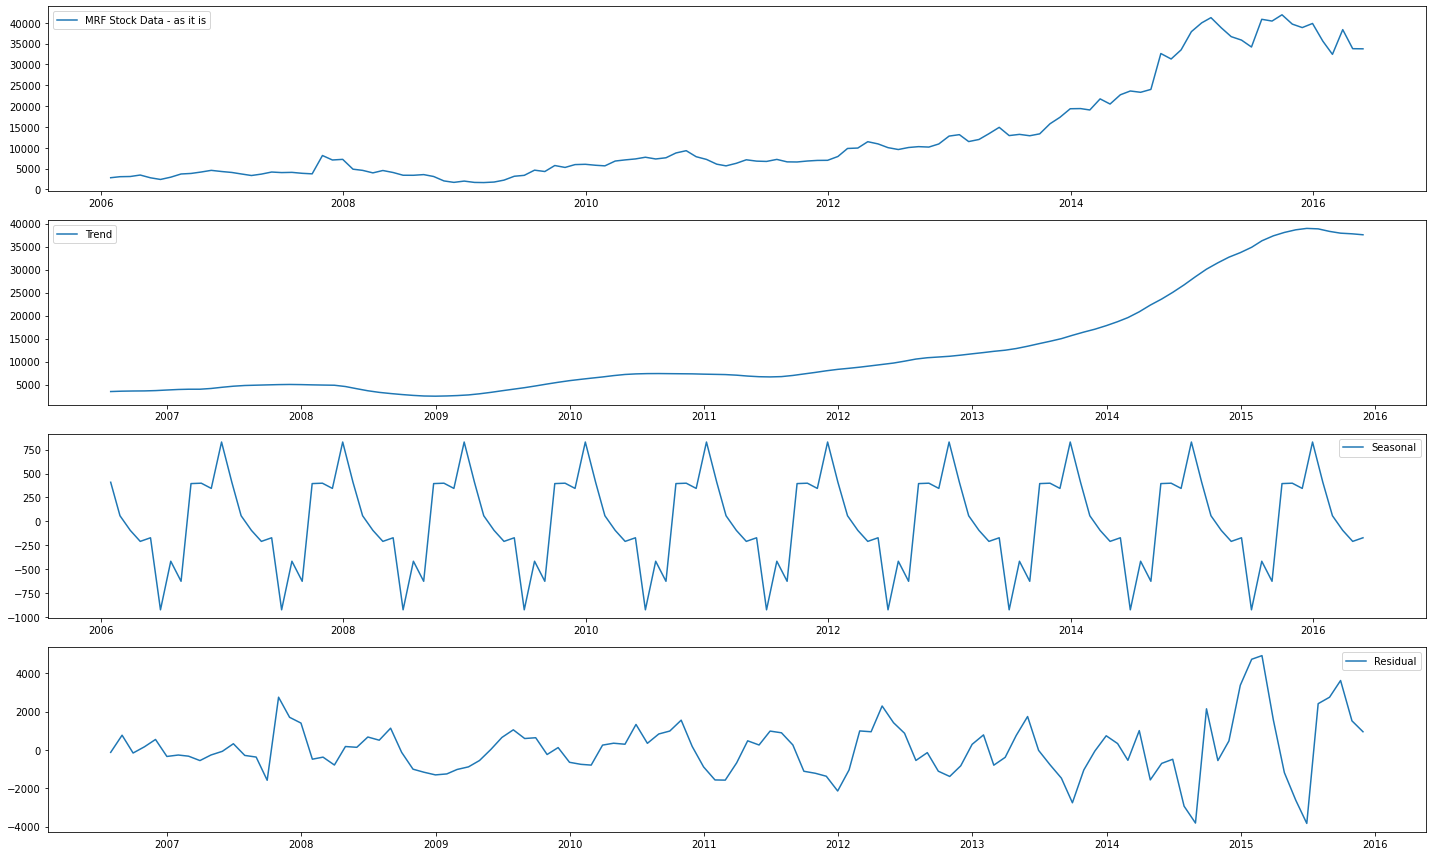

In [9]:


# different components of the Time series data
# period = 12 since the data is monthly

decomposition=seasonal_decompose(closeprice, period=12)
#decomposition=seasonal_decompose(np.asarray(closeprice), freq=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

#Seasonal decompose tells us what components are available in time series data.

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411) #4rows 1col 1st position
plt.plot(closeprice,label='MRF Stock Data - as it is')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In the above figure we can see the original series with different time series component. We can trend component in which there is a upward trend. Seasonal component shows the seasonal pattern in the graph. Residual shows the irregular component. 

## Demo - 2.2: Moving Average

In [10]:
lags = 4
moving_avg = closeprice.rolling(window=lags).mean()

In [11]:
df_ts = pd.DataFrame({'actual':closeprice['Close Price'], 'ma':moving_avg['Close Price']})
print(df_ts)

              actual          ma
tdate                           
2006-01-31   2811.60         NaN
2006-02-28   3056.45         NaN
2006-03-31   3103.20         NaN
2006-04-30   3456.15   3106.8500
2006-05-31   2789.80   3101.4000
...              ...         ...
2016-01-31  35607.10  38502.2625
2016-02-29  32429.35  36686.5375
2016-03-31  38368.50  36563.1375
2016-04-30  33791.60  35049.1375
2016-05-31  33759.60  34587.2625

[125 rows x 2 columns]


In [12]:
df_ts.actual.head(lags).mean()

3106.85

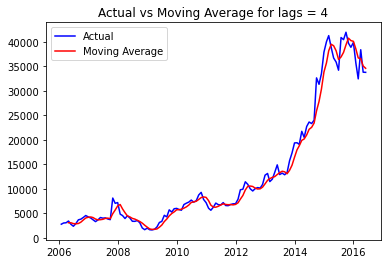

In [13]:
# plot the actual and moving average for comparison
plt.plot(df_ts.actual, color='blue',label = 'Actual')
plt.plot(df_ts.ma, color='red', label = 'Moving Average')
plt.title('Actual vs Moving Average for lags = ' + str(lags))
plt.legend()
plt.show()

Moving average is to help smooth the data. In this Graph we can see that by applying moving average, randomness and short term fluctuation in the closing price has been mitigated over the period of time.

In [14]:
help(SimpleExpSmoothing)

Help on class SimpleExpSmoothing in module statsmodels.tsa.holtwinters.model:

class SimpleExpSmoothing(ExponentialSmoothing)
 |  SimpleExpSmoothing(endog, initialization_method=None, initial_level=None)
 |  
 |  Simple Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The time series to model.
 |  initialization_method : str, optional
 |      Method for initialize the recursions. One of:
 |  
 |      * None
 |      * 'estimated'
 |      * 'heuristic'
 |      * 'legacy-heuristic'
 |      * 'known'
 |  
 |      None defaults to the pre-0.12 behavior where initial values
 |      are passed as part of ``fit``. If any of the other values are
 |      passed, then the initial values must also be set when constructing
 |      the model. If 'known' initialization is used, then `initial_level`
 |      must be passed, as well as `initial_trend` and `initial_seasonal` if
 |      applicable. Default is 'estimated'. "legacy-heuristic" uses the same
 |      valu

## Demo - 2.3: Exponential Smoothing

Let's consider the 4 plots from Demo - 2.1

Compare the original data range and seasonality data range, we find data range in seasonality is very minimal and that can be ignored.

Hence we can say there is no seasonality in this MRF dataset.

Seasonality components must be checked with respect to the base of the original and not just on the shape.

### Simple Exponent Smoothing (no trend/seasonality)

In [15]:
# Simple Exponent - when there is no trend/seasonality
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [16]:
"""In this lesson we'll cover how to fit a model to data using matlab's minimization routine 'fminsearch'. 
Model fitting is a procedure that takes three steps:

First you need a function that takes in a set of parameters and returns a predicted data set.

Second you need an 'error function' that provides a number representing the difference between your data and 
the model's prediction for any given set of model parameters. This is usually either the sums of squared error (SSE) or maximum likelihood.

Third you need to find the parameters that minimize this difference. Once you set things up properly, this third 
step is easy thanks to the nerds at Mathworks."""

"In this lesson we'll cover how to fit a model to data using matlab's minimization routine 'fminsearch'. \nModel fitting is a procedure that takes three steps:\n\nFirst you need a function that takes in a set of parameters and returns a predicted data set.\n\nSecond you need an 'error function' that provides a number representing the difference between your data and \nthe model's prediction for any given set of model parameters. This is usually either the sums of squared error (SSE) or maximum likelihood.\n\nThird you need to find the parameters that minimize this difference. Once you set things up properly, this third \nstep is easy thanks to the nerds at Mathworks."

In [17]:
data = closeprice['Close Price']

In [18]:
# create forecast for different values of alpha. Plot and understand the charts

# dictionary to store the forecast for each alpha
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df = simplesmoothing(data,a)
    d_simple_exp[a] = df.forecast

In [19]:
d_simple_exp

{0: tdate
 2006-01-31    2811.6
 2006-02-28    2811.6
 2006-03-31    2811.6
 2006-04-30    2811.6
 2006-05-31    2811.6
                ...  
 2016-01-31    2811.6
 2016-02-29    2811.6
 2016-03-31    2811.6
 2016-04-30    2811.6
 2016-05-31    2811.6
 Name: forecast, Length: 125, dtype: float64,
 0.2: tdate
 2006-01-31     2811.600000
 2006-02-28     2811.600000
 2006-03-31     2860.570000
 2006-04-30     2909.096000
 2006-05-31     3018.506800
                   ...     
 2016-01-31    38688.281887
 2016-02-29    38072.045510
 2016-03-31    36943.506408
 2016-04-30    37228.505126
 2016-05-31    36541.124101
 Name: forecast, Length: 125, dtype: float64,
 0.6: tdate
 2006-01-31     2811.600000
 2006-02-28     2811.600000
 2006-03-31     2958.510000
 2006-04-30     3045.324000
 2006-05-31     3291.819600
                   ...     
 2016-01-31    39672.035748
 2016-02-29    37233.074299
 2016-03-31    34350.839720
 2016-04-30    36761.435888
 2016-05-31    34979.534355
 Name: forecast,

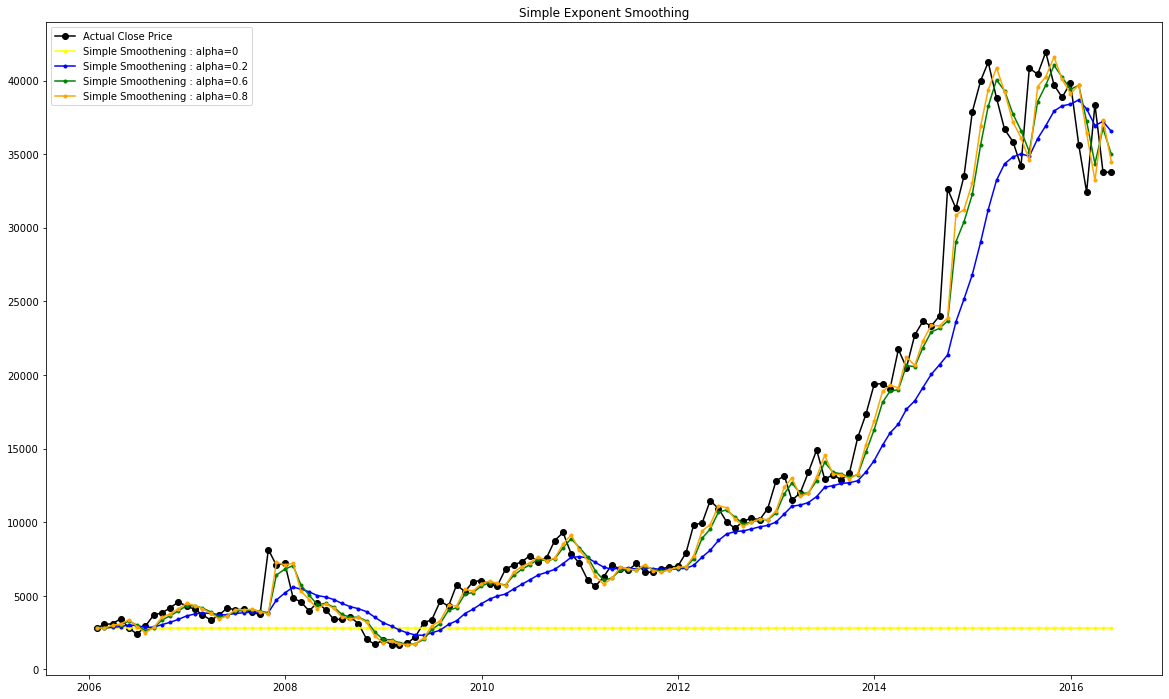

In [20]:
colors = ['yellow','blue','green','orange']


# plot the actual and forecast data
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(data, marker='o', color='black',label='Actual Close Price')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

In the above time series plot using simple exponent smoothing we can observe that the higher the value of alpha has a more fitted line tahn the other line with respect to actual close price line. This line adjust to the changing condition more smoothly.  

### Double Exponent Smoothing (trend, but no seasonality)

In [21]:
# Double Exponent - when there is a trend, no seasonality (Holts' method) 
# parameters: alpha, beta

model = ExponentialSmoothing(data,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

"""The additive model is useful when the seasonal variation is relatively constant over time.
The multiplicative model is useful when the seasonal variation increases over time."""

# forecast with double exponent smoothing
f_dexp = model.fittedvalues
print(f_dexp)

tdate
2006-01-31     2964.255893
2006-02-28     3028.640130
2006-03-31     3131.898507
2006-04-30     3220.985358
2006-05-31     3386.361303
                  ...     
2016-01-31    39091.285268
2016-02-29    37645.656407
2016-03-31    35331.972677
2016-04-30    34972.508425
2016-05-31    33651.466181
Length: 125, dtype: float64


Text(0.5, 1.0, 'Double Exponent Smoothing')

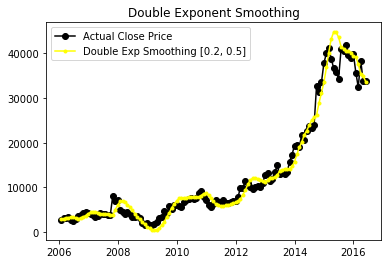

In [22]:
# plot the actual and smooth data
plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In the above Double exponential Smoothing plot we can see that time series data has a trend at the estimate level(.5) and trend (.2) smoothing constatnt from the data to optimize the fitness of line. 

### Triple Exponent Smoothing (trend and seasonality)

In [23]:
# read the data
path="DS3_C1_S2_Elecprod_Data_Concept.csv"
elec_data = pd.read_csv(path,index_col='DATE',parse_dates=True)

In [24]:
elec_data.head()
print(elec_data)

               Value
DATE                
1985-01-01   72.5052
1985-02-01   70.6720
1985-03-01   62.4502
1985-04-01   57.4714
1985-05-01   55.3151
...              ...
2017-09-01   98.6154
2017-10-01   93.6137
2017-11-01   97.3359
2017-12-01  114.7212
2018-01-01  129.4048

[397 rows x 1 columns]


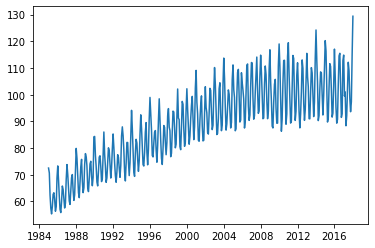

In [25]:
# plot the data
plt.plot(elec_data)
#plt.plot(data[0:60])

In [26]:
# build model
model = ExponentialSmoothing(elec_data.Value,trend='add',seasonal='add',seasonal_periods=12).fit()
print(model)

Text(0.5, 1.0, 'Triple Exponent Smoothing')

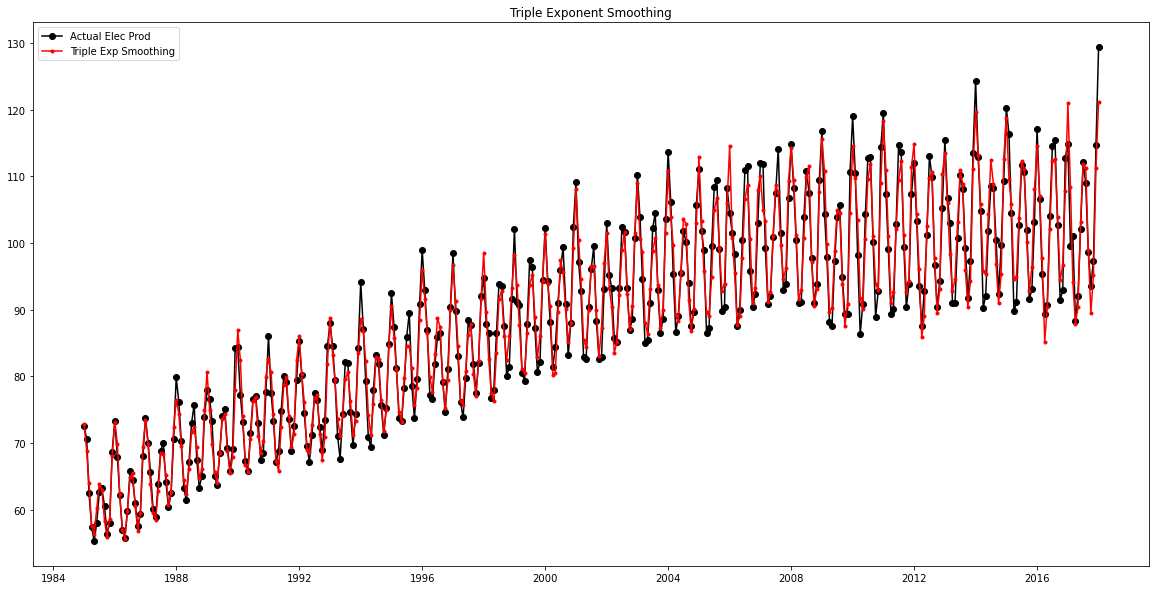

In [27]:
# plot the actual and triple smoothing values
ax = plt.subplots(figsize = (20,10))
plt.plot(elec_data.Value, marker='o',color='black',label='Actual Elec Prod')
plt.plot(model.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')

In the above plot we can see the yearly seasonality with trend over the years. In this plot we can see the upward trend and yearly seasonality. 

In [28]:
# forecast
model.forecast(10)

2018-02-01    115.383215
2018-03-01    109.335970
2018-04-01     98.076150
2018-05-01    100.602275
2018-06-01    111.844655
2018-07-01    121.378946
2018-08-01    120.067686
2018-09-01    109.424508
2018-10-01    101.137306
2018-11-01    104.278160
Freq: MS, dtype: float64

## Demo - 2.4: Time Series - Stationarity Check

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the file
path="DS3_C1_S2_MRF_Data_Concept.csv"
stock = pd.read_csv(path)
# take the feature to do forecast
mystock = stock[['Close Price']]
print(mystock)

     Close Price
0        2811.60
1        3056.45
2        3103.20
3        3456.15
4        2789.80
..           ...
120     35607.10
121     32429.35
122     38368.50
123     33791.60
124     33759.60

[125 rows x 1 columns]


In [3]:
# ADF test to determine data stationarity
def checkStationarity(data):
    pvalue = adfuller(data['Close Price'])[1]
    #pvalue = adfuller(data['Close Price'])
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [4]:
# function call
print(checkStationarity(mystock))

0.9574107029213336
pvalue=0.9574107029213336. Data is not Stationary. Make the data stationary before model building


In [5]:
# difference the data by 1 (default)
diff_mystock = mystock - mystock.shift(2)
print(diff_mystock)

     Close Price
0            NaN
1            NaN
2         291.60
3         399.70
4        -313.40
..           ...
120     -3255.00
121     -7418.25
122      2761.40
123      1362.25
124     -4608.90

[125 rows x 1 columns]


In [6]:
# remove the Nulls from the differenced data
print('Before removing Nulls,total records = ', len(diff_mystock))
diff_mystock.dropna(inplace = True)
print('After removing Nulls, total records = ', len(diff_mystock))
print(diff_mystock)

Before removing Nulls,total records =  125
After removing Nulls, total records =  123
     Close Price
2         291.60
3         399.70
4        -313.40
5       -1060.30
6         152.60
..           ...
120     -3255.00
121     -7418.25
122      2761.40
123      1362.25
124     -4608.90

[123 rows x 1 columns]


In [7]:
# check if the differenced data is stationary
checkStationarity(diff_mystock)

0.3265917296220848


'pvalue=0.3265917296220848. Data is not Stationary. Make the data stationary before model building'

Text(0.5, 1.0, 'Actual vs Differenced data')

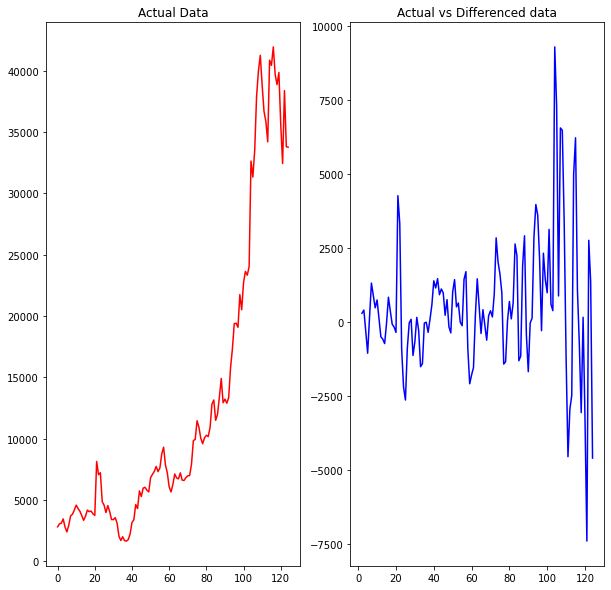

In [8]:
# plot the Actual data and Differenced data
ax = plt.subplots(figsize = (10,10))
plt.subplot(121)

plt.plot(mystock,color='red')
plt.title('Actual Data')

plt.subplot(122)
plt.plot(diff_mystock,color='blue')
plt.title('Differenced Data')

plt.title("Actual vs Differenced data")

In the above figure the Actual plot shows the trend in the data which makes the data Not stationary that means we can not proceed with the time series model. But after doing differencing we do not find the trend component in the plot which make the data stationary also indicate that we can now proceed with the time series model.